# Assessing Variable Importance using Tree-based Methods

#### Description:

This codebook covers how to assess variable importance using tree-based methods

#### Skill level:

- Intermediate

-------------------------
### Import the required libraries

In [1]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../../'))
sys.path.append(platform_path)

In [2]:
#!pip install shap

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import shap
import matplotlib.pyplot as plt
import seaborn as sns

-------------------------
### Read data into a dataframe

In [4]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/boston.txt'))

-------------------------
### Check shape and head of the dataframe

In [5]:
df_raw.shape

(506, 14)

In [6]:
df_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


-------------------------
### Separate features from the label

In [7]:
X_all = df_raw.drop('MDEV', axis=1)

In [8]:
y_true_all = df_raw[['MDEV']].values

-------------------------
### Make a split between training and test sets of data

In [9]:
X_train, X_test, y_true_train, y_true_test = train_test_split(X_all, y_true_all, test_size=0.3)

-------------------------
### Fit a decision tree regressor

In [10]:
clf = DecisionTreeRegressor()

clf.fit(X_train, y_true_train)

DecisionTreeRegressor()

-------------------------
### Get feature importance from the fitted model

In [11]:
clf.feature_importances_

array([0.05866097, 0.00234061, 0.00460135, 0.        , 0.00896223,
       0.2125555 , 0.01222843, 0.07879463, 0.0023913 , 0.01541683,
       0.01154108, 0.00669922, 0.58580787])

<BarContainer object of 13 artists>

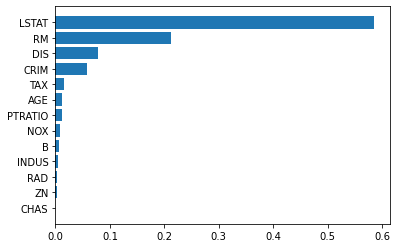

In [12]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_all.columns[sorted_idx], clf.feature_importances_[sorted_idx])

-------------------------
### Generate predictions using the fitted model

In [13]:
y_pred_train = clf.predict(X_train.values)
y_pred_test = clf.predict(X_test.values)

-------------------------
### Get feature importance from the fitted model using permutation method

In [14]:
perm_importance = permutation_importance(clf, X_test, y_pred_test)

<BarContainer object of 13 artists>

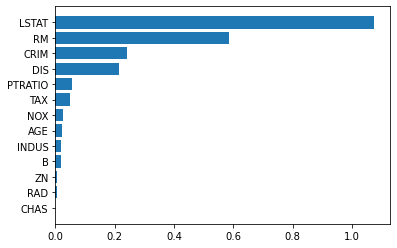

In [15]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_all.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])

-------------------------
### Get feature importance from the fitted model using shap interpretation

In [16]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

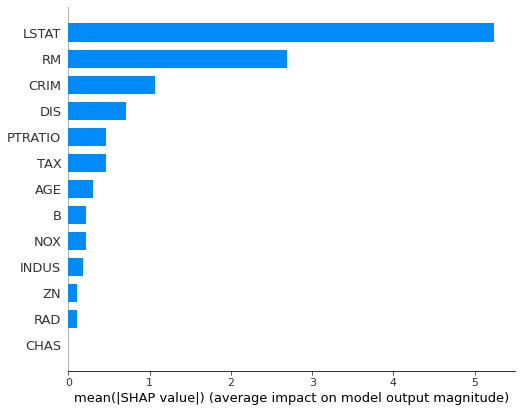

In [17]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

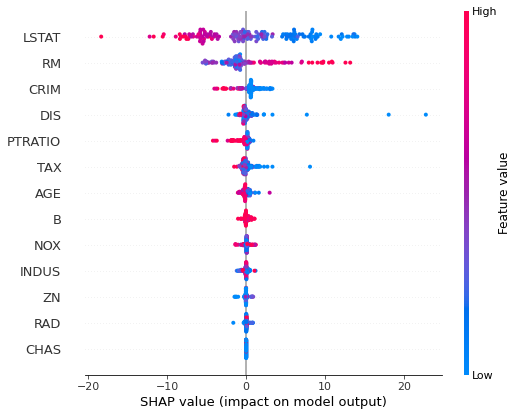

In [19]:
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)